## **Portugal UCI Bank**

## Introducción


A lo largo del siguiente notebook se desarrolla el analisis de datos sobre un dataset de una campaña de marketing de un banco, en el cual se tiene información de los mismos, del metodo de contacto y del resultado de la campaña.

A su vez se buscarar el modelo mas optimo para la predicción del resultado.

## **IMPORTACION DE BIBLIOTECAS**

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

df = pd.read_csv('UCI.csv')
df["y"].replace(to_replace=["yes","no"], value=[1,0], inplace=True,)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


## **FUNCIONES**

In [ ]:
#Defino la funcion para un grafico de barras normal 
def graf_barras(ejex,ejey,ylabel,xlabel,title):
    plt.barh(ejex,ejey, color='green')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
#Funcion de barras superpuestas
def barrassup (Y):
  stackdf = pd.DataFrame()
  totals = df.groupby(Y).agg({"y":"count"})["y"].tolist() # contar cuenta los ceros tambien -> total casos
  positives = df.groupby(Y).agg({"y":"sum"})["y"].tolist() # como la categoria positive = 1, sumar cuenta los positivos
  negatives = []
  for x in totals:
    negatives.append(x-positives[totals.index(x)])

  stackdf["Positives"] = df.groupby(Y).agg({"y":"sum"})["y"]
  stackdf["Negatives"] = negatives
  stackdf["Totals"] = totals
  print(stackdf)
  print("\n")
  stackdf['Positives'].plot(kind='bar',label='Yes',color='blue')
  stackdf['Negatives'].plot(kind='bar',label='No',color='orange',bottom=stackdf['Positives'])
  plt.title(Y.upper())
  plt.ylabel('Ocurrencias')
  plt.legend()
#Funcion que nos devuelve los histogramas
def histograma (X):
  #regla de sturges
  k = int(2 + math.log2(4521))
  df[X].hist( bins= k,rwidth = 0.85)
  plt.xlabel(X)
  plt.ylabel('Ocurrencias')
  plt.title(X + ' histogram')  
#Defino la funcion para hacer un grafico de torta
def torta(total,nombre, titulo):
    plt.pie(total, labels=nombre, autopct="%0.1f %%")
    plt.axis("equal")
    plt.title(titulo)
    plt.show()
#Defino la funcion para hacer un diagrama de caja simple
def diagrama_caja(info,titulo):
    sns.set(style='whitegrid')
    graf=sns.boxplot(data=info)
    graf.set_title(titulo)
#Defino la funcion para hacer un grafico estilo anillo
def anillo(total,nombre, titulo):
    plt.pie(total, labels=nombre, autopct="%0.1f %%")
    plt.axis("equal")
    plt.title(titulo)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
#Defino la funcion para hacer un grafico de curva ROC
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [ ]:
#Defino la funcion para hacer un grafico de barras superpuesto
def graf_barrassup(no, yes, indice, grupos, title): #Info: https://pythonbros.com/grafica-de-barras-con-matplotlib/
  plt.bar(indice, yes, label = "Yes", color = "blue") #armo las barras para yes
  plt.bar(indice, no, label = "Total", bottom = yes, color = "orange") #armo las barras para los totales y las pego sobre el gráfico anterior
  plt.xticks(indice, grupos) #esto es para matchear los índices con el grupo 
  plt.title(title)
  plt.legend()

##**INFO DEL DATASET**

In [ ]:
#df.describe(include = "all")
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [ ]:
df.isnull().sum() #no hay valores nulos

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.dtypes #tipo de dato de cada feature

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd380fa4e50>,
      dtype=object)

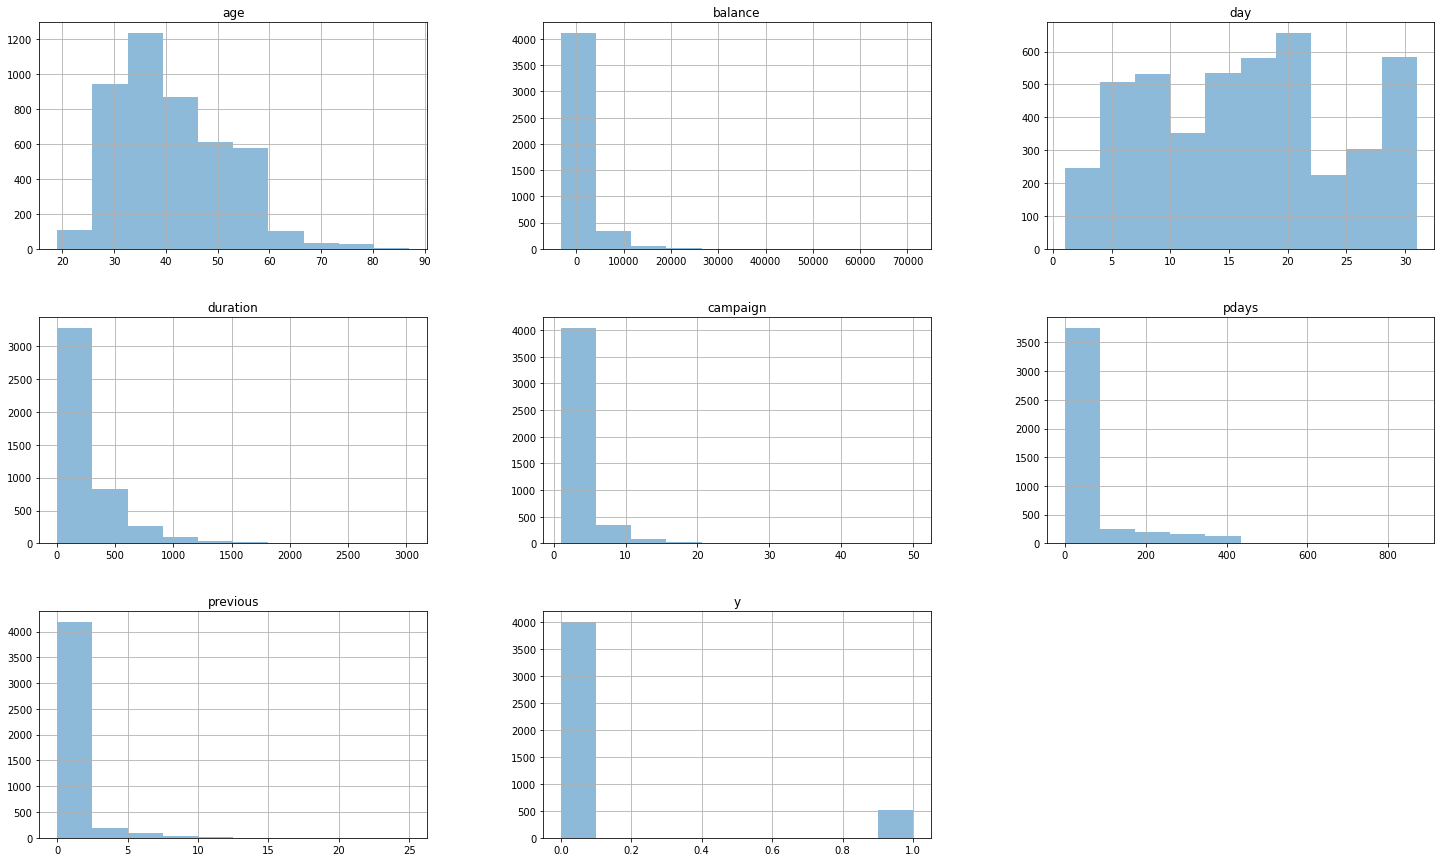

In [ ]:
df.hist(alpha=0.5, figsize=(25,15))

## ESTADO CIVIL

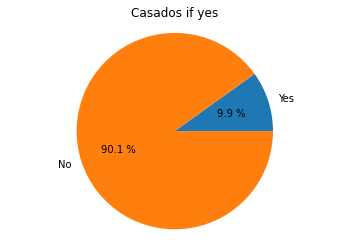

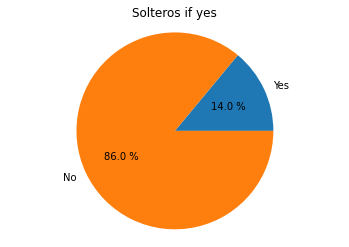

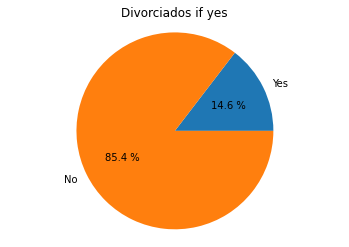

In [ ]:
#Grafico de tortas(ver forma mas resumida)
total=df['marital'].value_counts()
yes= [df.groupby(by=["marital","y"]).size()[1], df.groupby(by=["marital","y"]).size()[3], df.groupby(by=["marital","y"]).size()[5]]
total1=[yes[1],total['married']-yes[1]]
total2=[yes[2], total['single']-yes[2]]
total3=[yes[0], total['divorced']-yes[0]]
torta1=torta(total1,['Yes', 'No'], 'Casados if yes')
torta2=torta(total2,['Yes', 'No'], 'Solteros if yes')
torta3=torta(total3,['Yes', 'No'], 'Divorciados if yes')

## **ESTUDIOS**

           Positives  Negatives  Totals
education                              
primary           64        614     678
secondary        245       2061    2306
tertiary         193       1157    1350
unknown           19        168     187




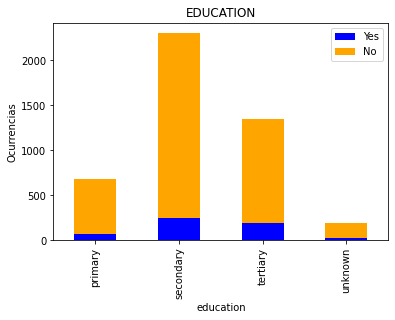

In [ ]:
barrassup('education')

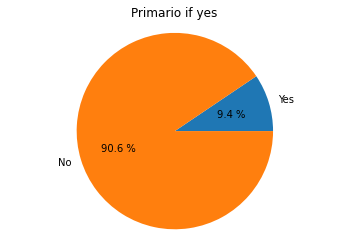

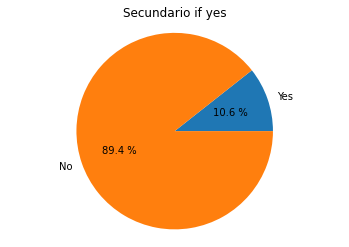

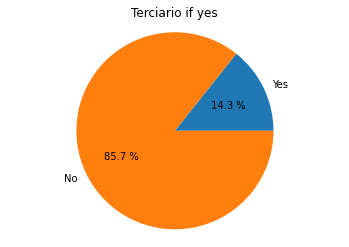

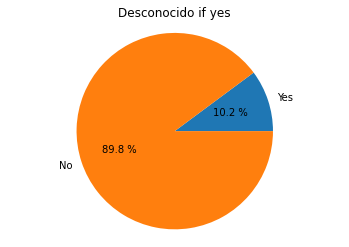

In [ ]:
#Grafico de tortas (ver forma mas resumida)
total=df['education'].value_counts()
yes= [df.groupby(by=["education","y"]).size()[1], df.groupby(by=["education","y"]).size()[3], df.groupby(by=["education","y"]).size()[5],df.groupby(by=["education","y"]).size()[7]]

total1=[yes[0],total['primary']-yes[0] ]
total2=[yes[1], total['secondary']- yes[1]]
total3=[yes[2], total['tertiary']- yes[2]]
total4=[yes[3], total['unknown']- yes[3]]
torta1=torta(total1,['Yes', 'No'], 'Primario if yes')
torta2=torta(total2,['Yes', 'No'], 'Secundario if yes')
torta3=torta(total3,['Yes', 'No'], 'Terciario if yes')
torta4=torta(total4,['Yes', 'No'], 'Desconocido if yes')

## **EDADES**

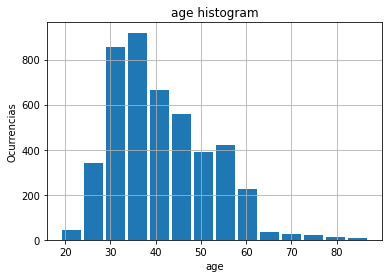

In [ ]:
histograma('age')

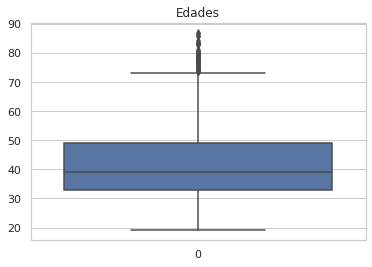

In [ ]:
#GRAFICO DE EDADES
#Grafico de diagrama de caja 
a=df['age']
diagrama_caja(a, 'Edades')

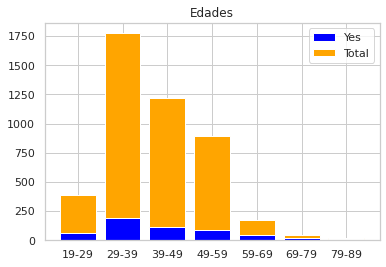

In [ ]:
yes = [df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[1], 
       df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[1]]

indice = [0,1,2,3,4,5,6]

no = [df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[0], 
       df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[0]]

graf_barrassup(no, yes, indice,['19-29','29-39','39-49','49-59','59-69','69-79','79-89'], "Edades")

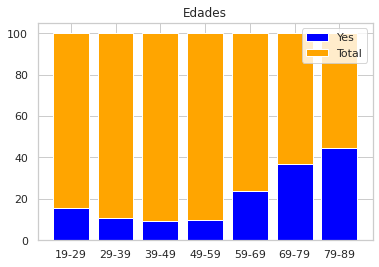

In [ ]:
yes = [(df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[1]+ df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[1]+df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[1]+df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[1]+ df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[1]+ df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[1]+ df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[1]*100/(df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[1]+ df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[0]))]

indice = [0,1,2,3,4,5,6]

no = [(df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[1]+ df[(df.age >= 19) & (df.age < 29)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[1]+df[(df.age >= 29) & (df.age < 39)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[1]+df[(df.age >= 39) & (df.age < 49)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[1]+ df[(df.age >= 49) & (df.age < 59)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[1]+ df[(df.age >= 59) & (df.age < 69)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[1]+ df[(df.age >= 69) & (df.age < 79)].groupby(by=["y"]).size()[0])), 
       (df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[0]*100/(df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[1]+ df[(df.age >= 79) & (df.age < 89)].groupby(by=["y"]).size()[0]))]

graf_barrassup(no, yes, indice,['19-29','29-39','39-49','49-59','59-69','69-79','79-89'], "Edades")

## **OCUPACION** 

               Positives  Negatives  Totals
job                                        
admin.                58        420     478
blue-collar           69        877     946
entrepreneur          15        153     168
housemaid             14         98     112
management           131        838     969
retired               54        176     230
self-employed         20        163     183
services              38        379     417
student               19         65      84
technician            83        685     768
unemployed            13        115     128
unknown                7         31      38




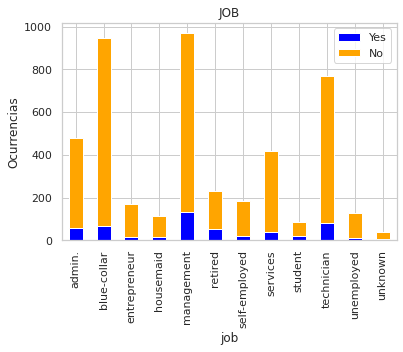

In [ ]:
barrassup('job')

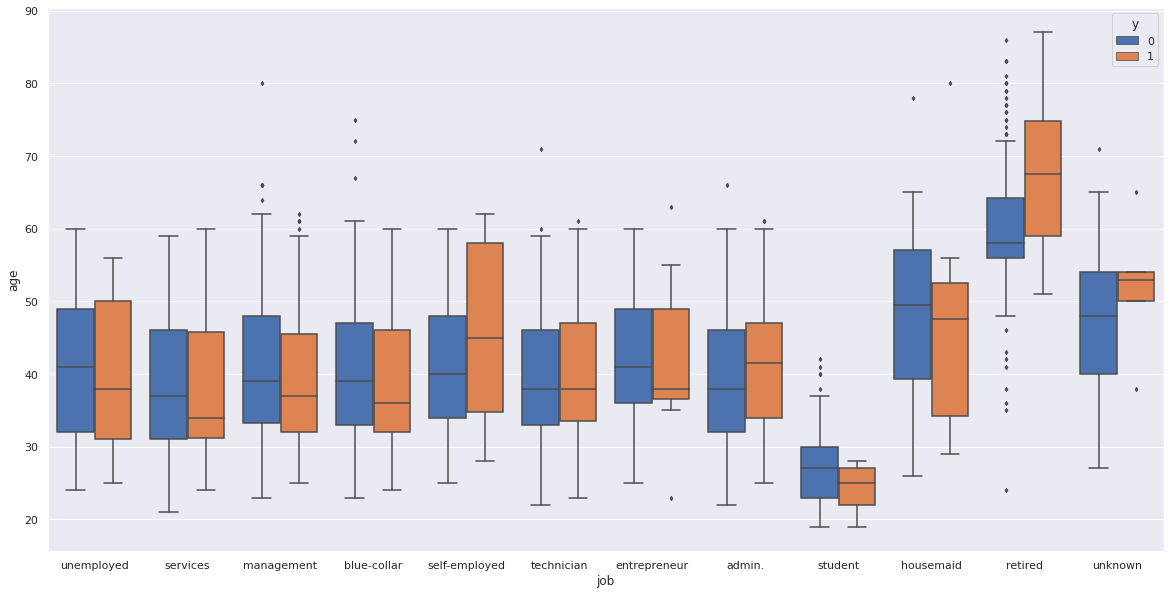

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.boxplot(x="job",y="age",hue="y",data=df,  palette=None, saturation=3.75, width=0.8, dodge=True, fliersize=3, linewidth=None, whis=1.0, notch=False, ax=None)

## **POUTCOME**

          Positives  Negatives  Totals
poutcome                              
failure          63        427     490
other            38        159     197
success          83         46     129
unknown         337       3368    3705




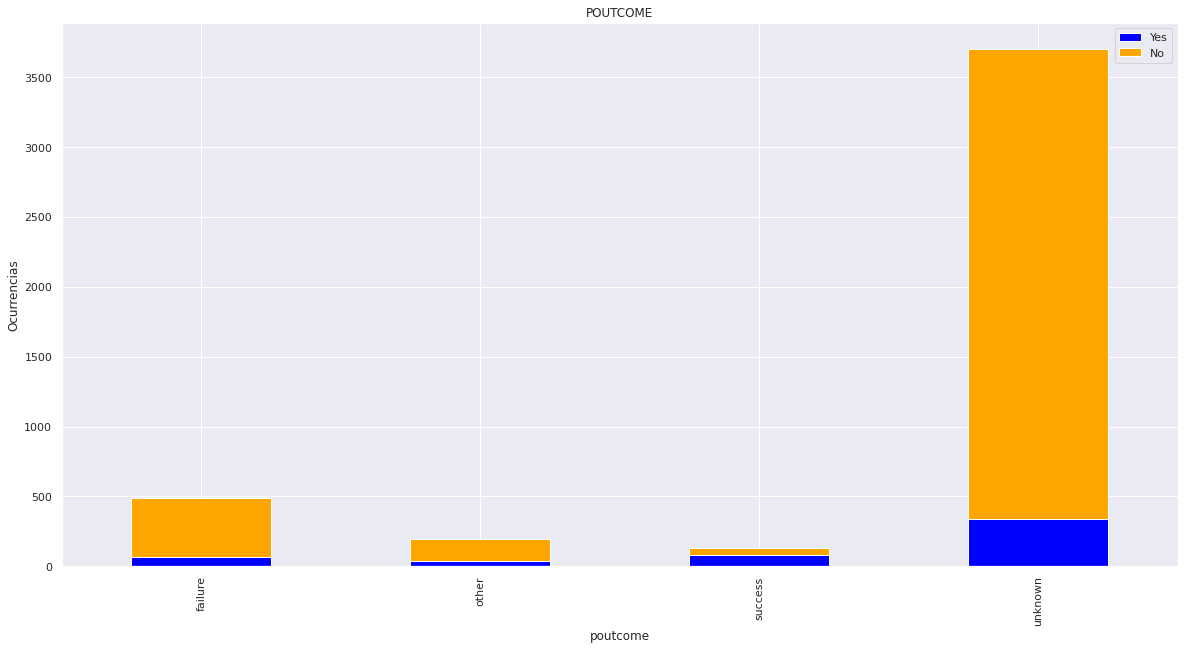

In [ ]:
barrassup('poutcome')

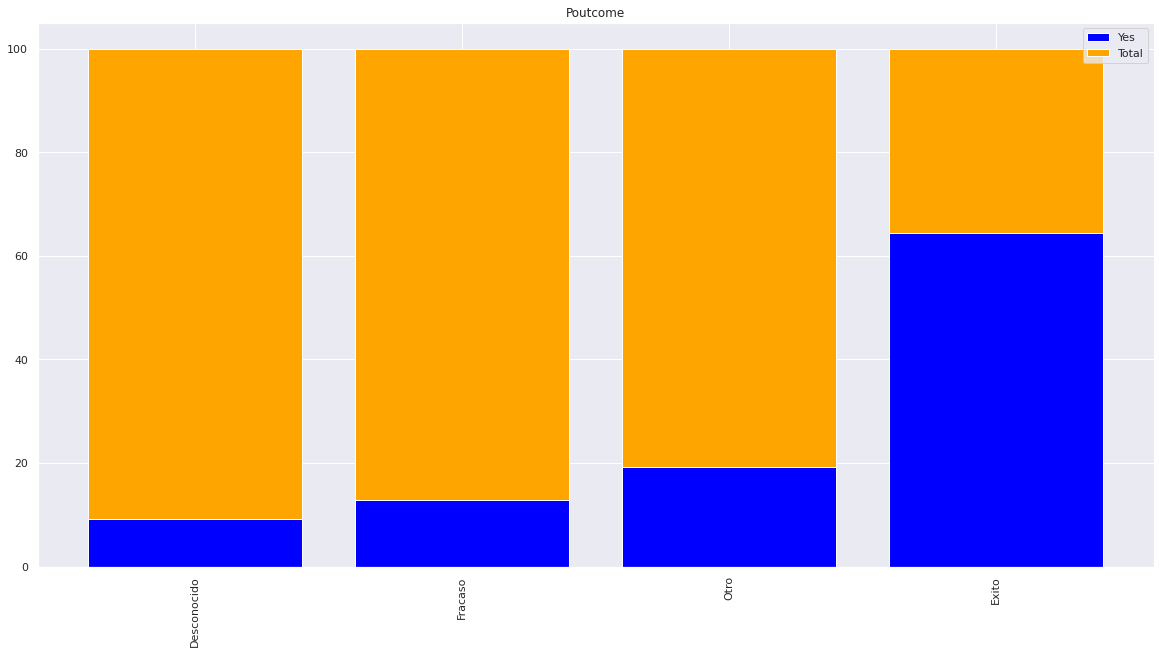

In [ ]:
yes_=[df.groupby(by=['poutcome', 'y']).size()[1],df.groupby(by=['poutcome', 'y']).size()[3],df.groupby(by=['poutcome', 'y']).size()[5], df.groupby(by=['poutcome', 'y']).size()[7]]
totales_ =df['poutcome'].value_counts()
desconocido_yes=yes_[3]
fracaso_yes=yes_[0]
otro_yes=yes_[1]
exito_yes=yes_[2]
yes=[desconocido_yes, fracaso_yes, otro_yes, exito_yes]
desconocido=desconocido_yes/totales_['unknown']
fracaso=fracaso_yes/totales_['failure']
otro=otro_yes/totales_['other']
exito=exito_yes/totales_['success']

total=[desconocido*100, fracaso*100, otro*100, exito*100]
primero=[100-total[0], 100-total[1], 100-total[2], 100-total[3]]
indice_ = [0,1,2,3]
grupos_ = ["Desconocido", "Fracaso", "Otro", "Exito"]
title_ = "Poutcome"
plt.xticks(rotation = 90)
a=graf_barrassup(primero,total, indice_, grupos_, title_) 

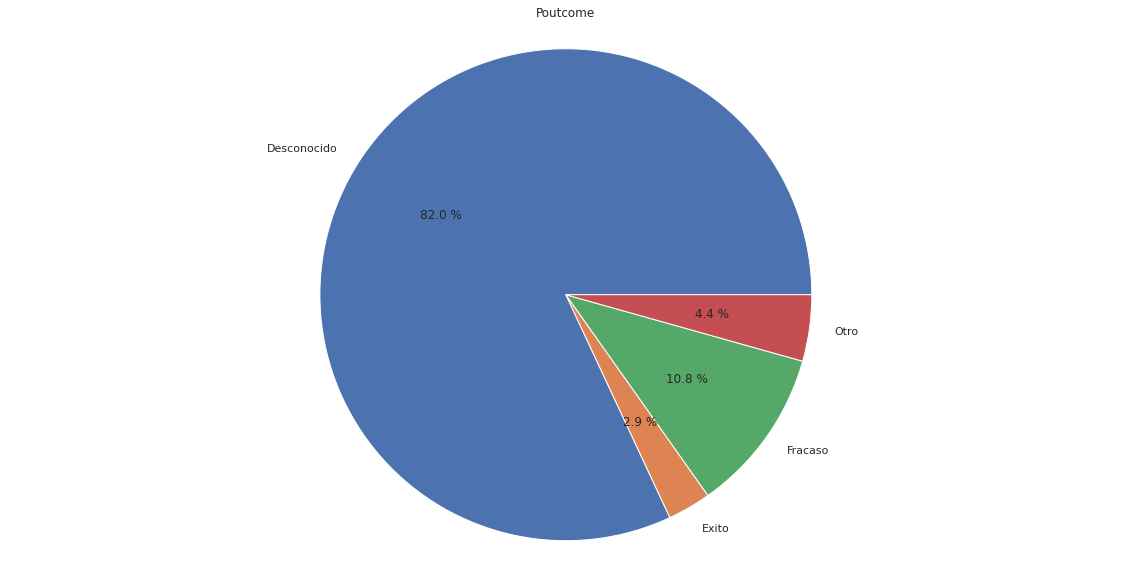

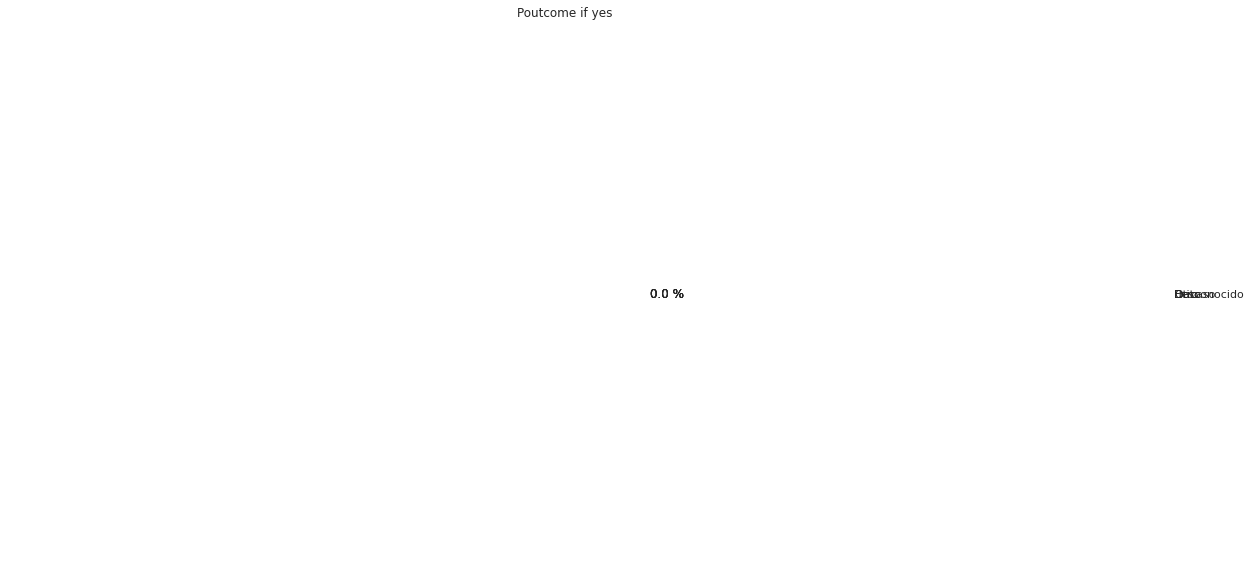

In [ ]:
#Grafico de tortas(ver forma mas resumida)
desconocido=df[df["poutcome"]=="unknown"]
desconocidos=desconocido.shape[0]
exito=df[df['poutcome']=='success']
exitos=exito.shape[0]
fracaso=df[df['poutcome']=='failure']
fracasos=fracaso.shape[0]
otro=df[df['poutcome']=='other']
otros=otro.shape[0]
total1=[desconocidos, exitos, fracasos, otros]

desconocidos_yes=desconocido[desconocido['y']=='yes'].shape[0]
exitos_yes=exito[exito['y']=='yes'].shape[0]
fracasos_yes=fracaso[fracaso['y']=='yes'].shape[0]
otros_yes=otro[otro['y']=='yes'].shape[0]
total2=[desconocidos_yes, exitos_yes, fracasos_yes, otros_yes]
nombres=['Desconocido', 'Exito', 'Fracaso', 'Otro']

torta1=torta(total1,nombres, 'Poutcome')
torta2=torta(total2,nombres, 'Poutcome if yes')

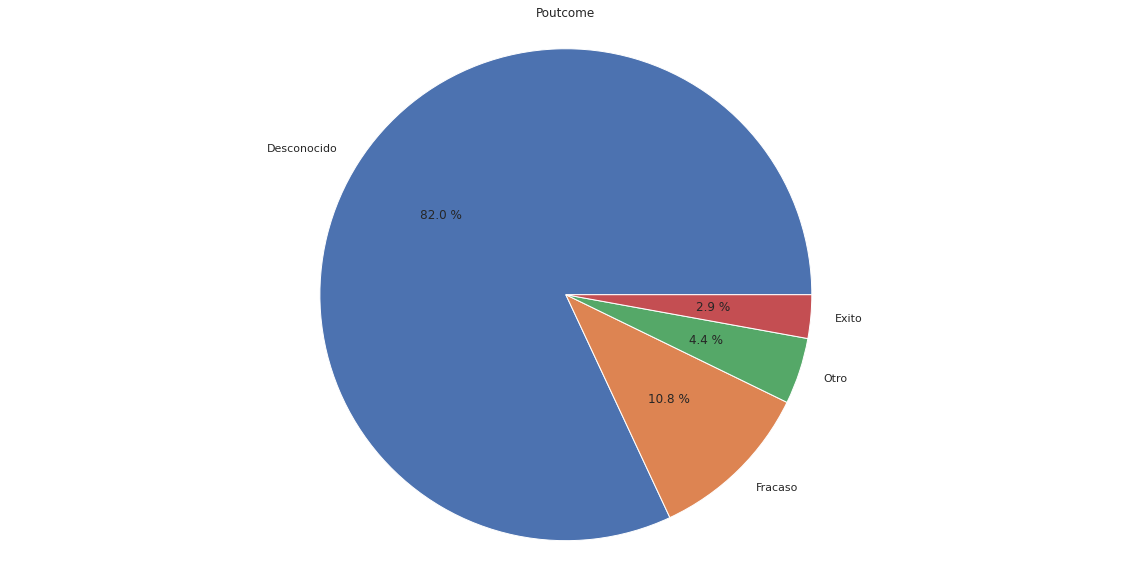

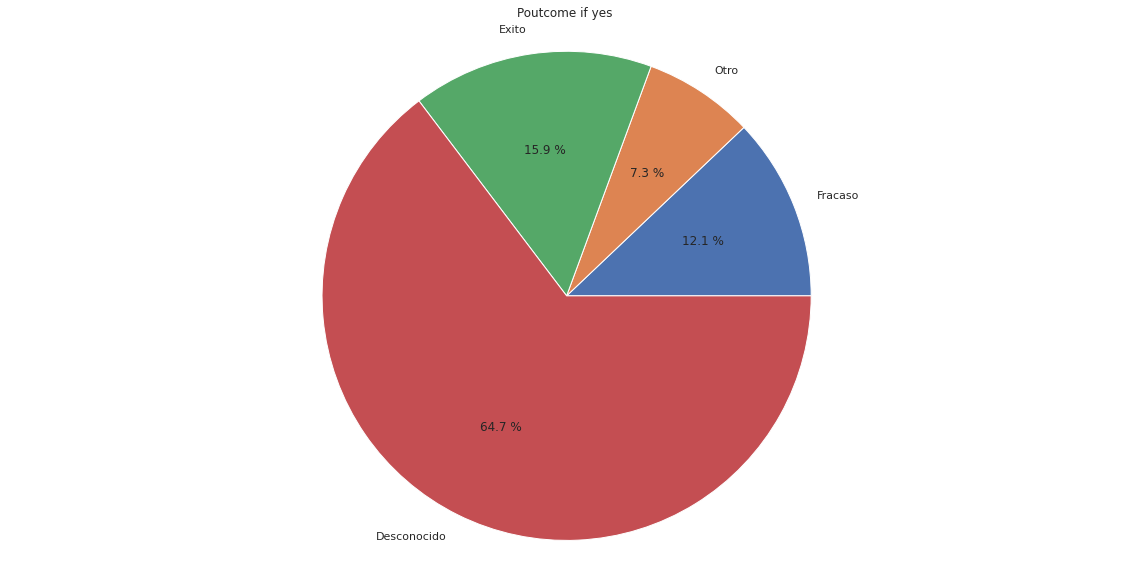

In [ ]:
#Grafico de tortas resumido
total=df['poutcome'].value_counts()
yes=[df.groupby(by=['poutcome', 'y']).size()[1],df.groupby(by=['poutcome', 'y']).size()[3],df.groupby(by=['poutcome', 'y']).size()[5], df.groupby(by=['poutcome', 'y']).size()[7]]
torta1=torta(total,['Desconocido', 'Fracaso', 'Otro', 'Exito'], 'Poutcome')
torta2=torta(yes,['Fracaso', 'Otro', 'Exito', 'Desconocido'], 'Poutcome if yes')

## DEFAULT

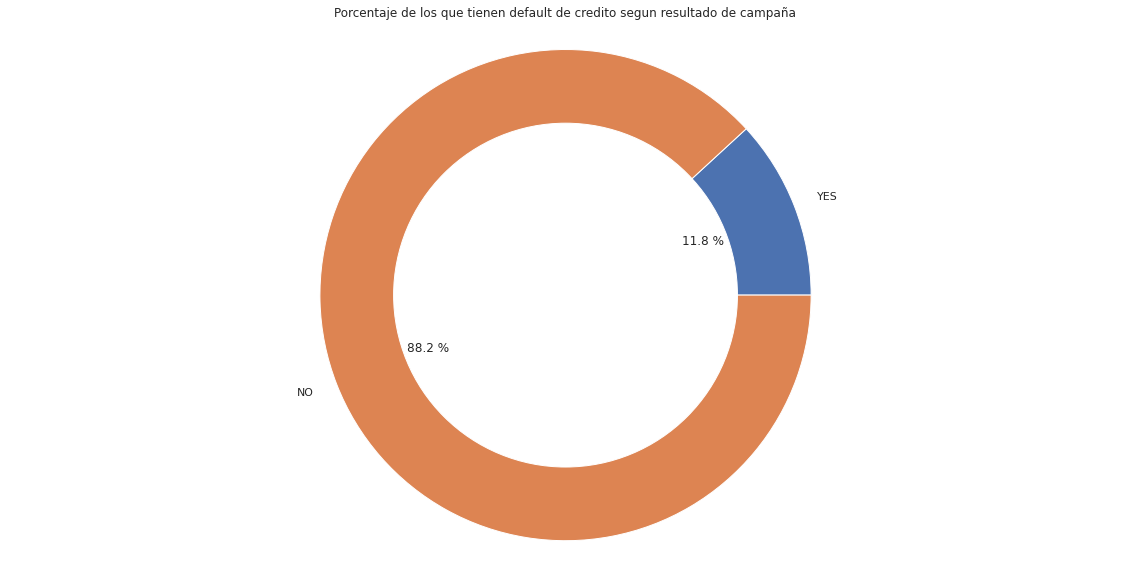

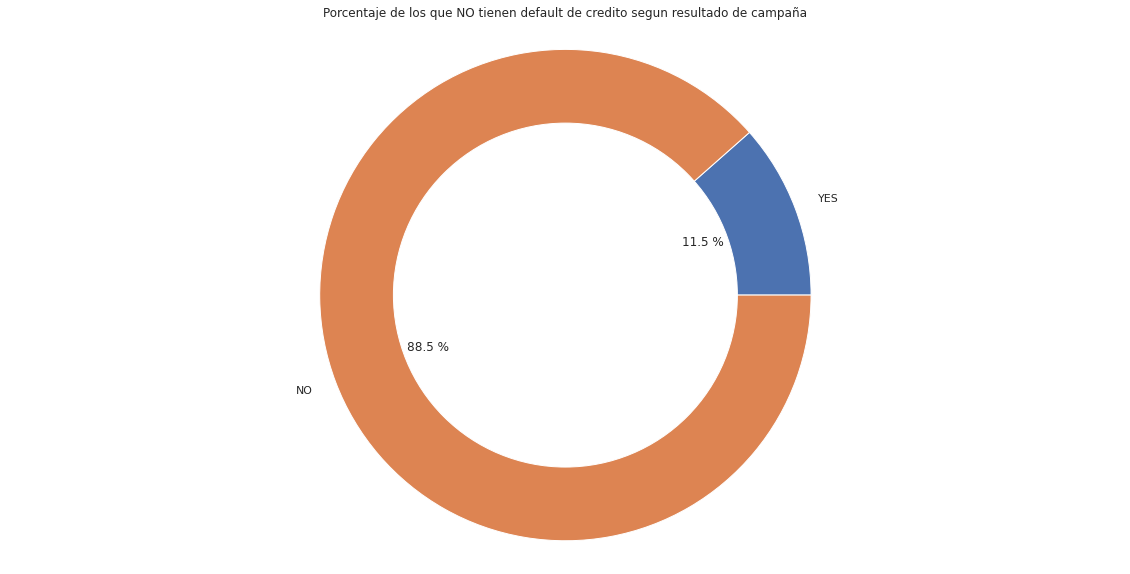

In [ ]:
#GRAFICOS DE DEFAULT
#Graficos de Anillo
total=df['default'].value_counts() 
yes=[df.groupby(by=['default', 'y']).size()[1],df.groupby(by=['default', 'y']).size()[3]] 
total_yes=total['yes']
a=yes[1]/total_yes
anillo1=anillo([a, 1-a],['YES', 'NO'], 'Porcentaje de los que tienen default de credito segun resultado de campaña')
plt.show()
total_no=total['no']
b=yes[0]/total_no
anillo2=anillo([b, 1-b],['YES', 'NO'], 'Porcentaje de los que NO tienen default de credito segun resultado de campaña')  
plt.show()

## HOUSING

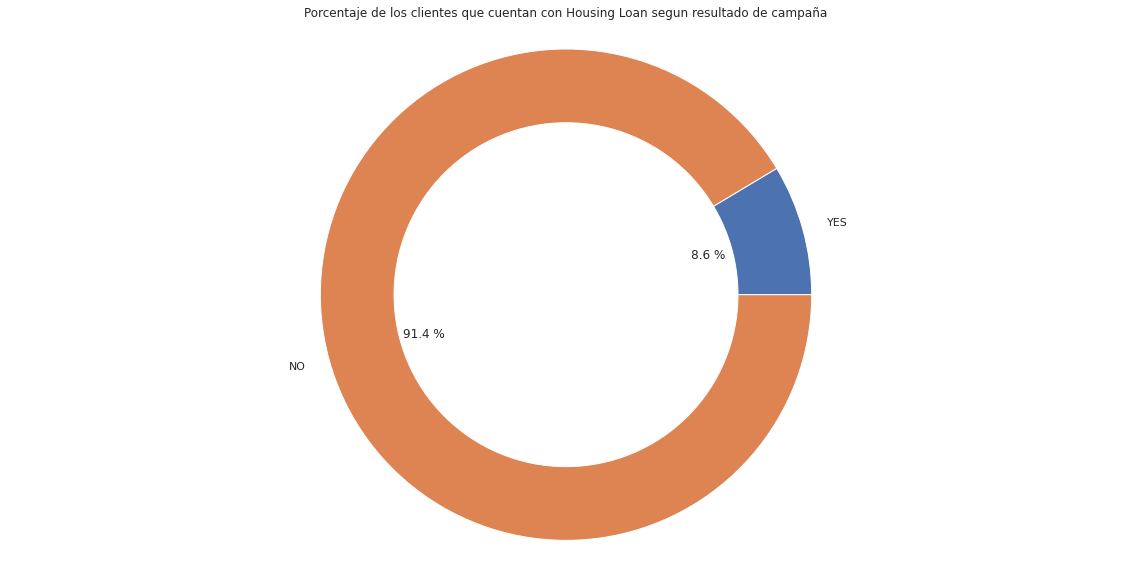

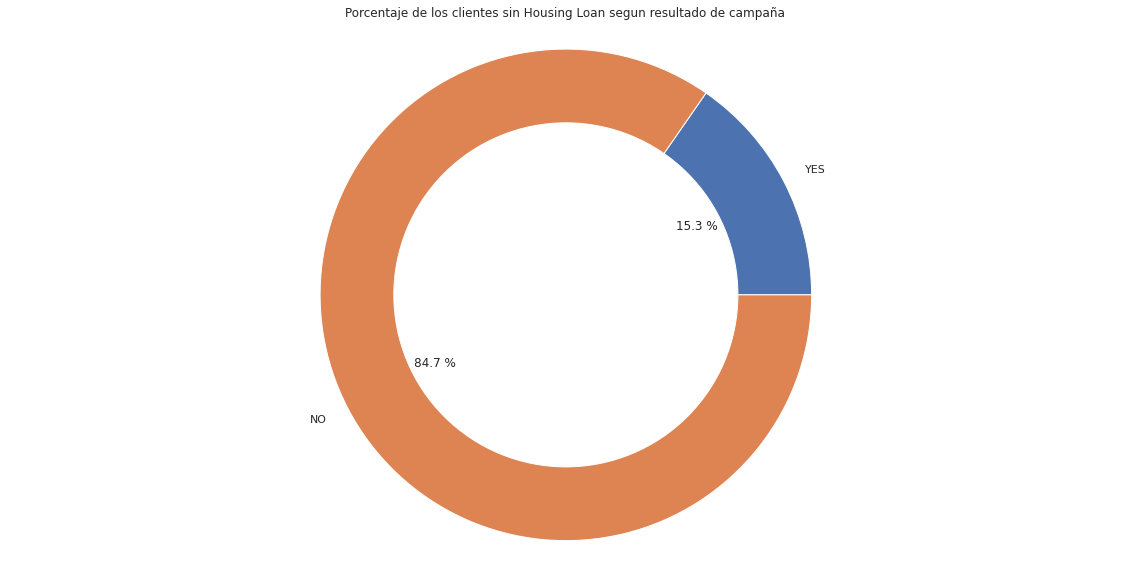

In [ ]:
#GRAFICOS DE HOUSING
#Graficos de Anilo
total=df['housing'].value_counts() 
yes=[df.groupby(by=['housing', 'y']).size()[1],df.groupby(by=['housing', 'y']).size()[3]] 
total_yes=total['yes']
total_no=total['no']
a=yes[1]/total_yes
b=yes[0]/total_no
anillo1=anillo([a, 1-a],['YES', 'NO'], 'Porcentaje de los clientes que cuentan con Housing Loan segun resultado de campaña')
plt.show()
anillo2=anillo([b, 1-b],['YES', 'NO'],'Porcentaje de los clientes sin Housing Loan segun resultado de campaña') 
plt.show()

## LOAN

      Positives  Negatives  Totals
loan                              
no          478       3352    3830
yes          43        648     691




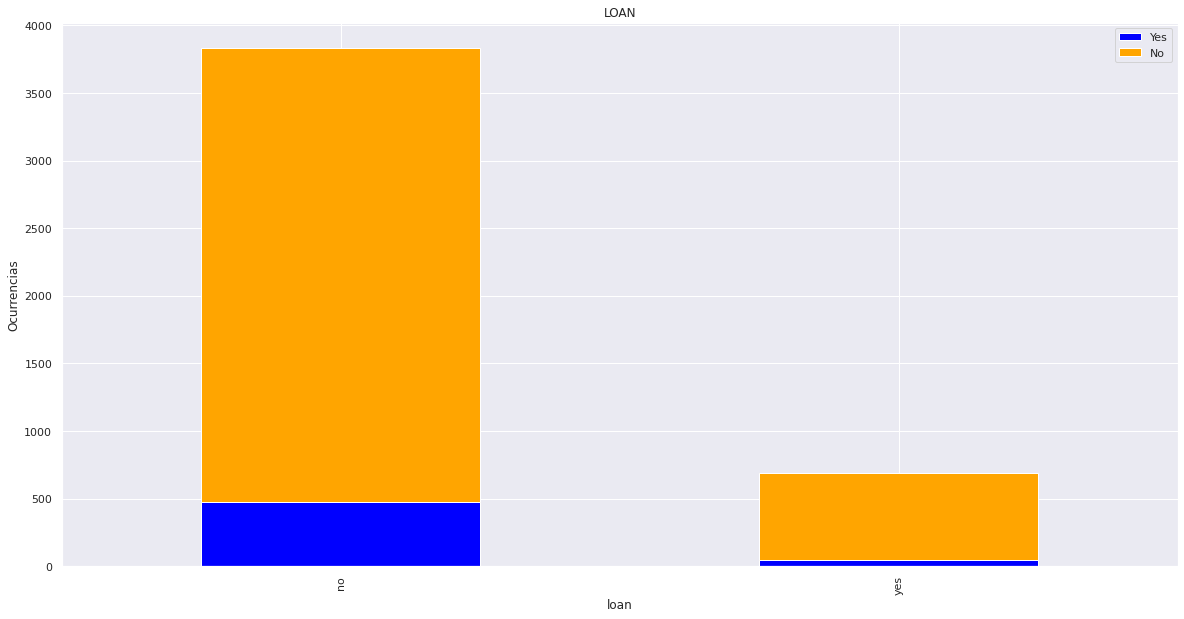

In [ ]:
barrassup('loan')

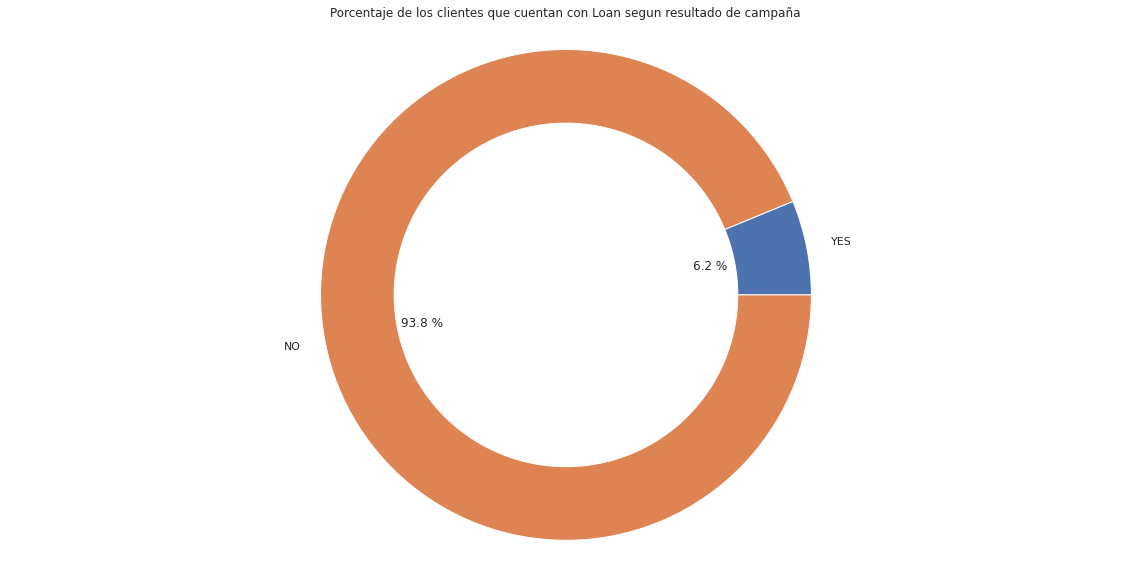

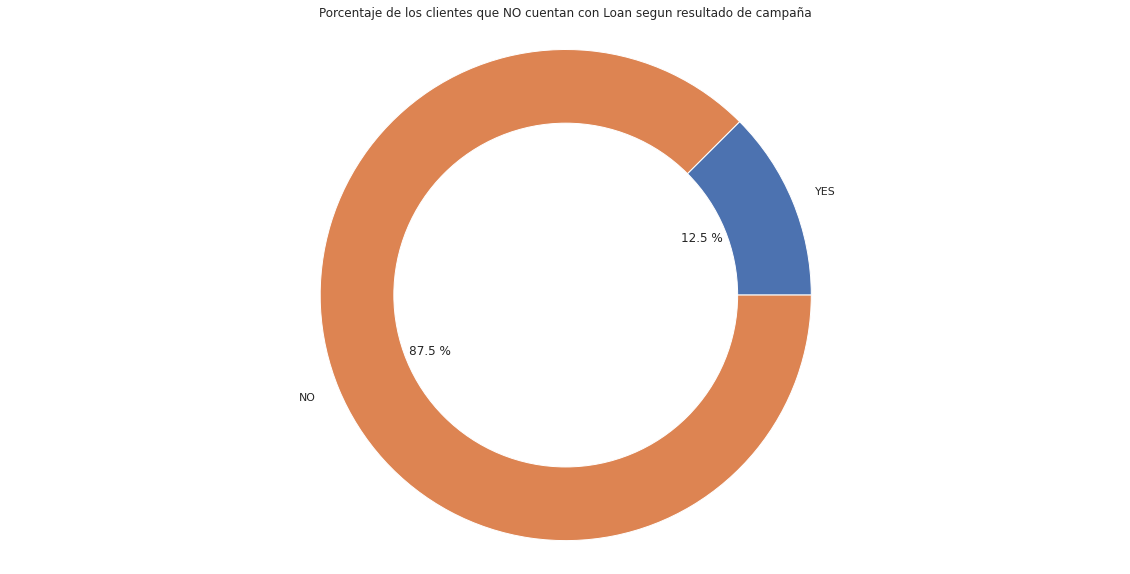

In [ ]:
#GRAFICOS DE PRESTAMOS PERSONALES (LOAN)
#Graficos de anillo
total=df['loan'].value_counts() 
yes=[df.groupby(by=['loan', 'y']).size()[1],df.groupby(by=['loan', 'y']).size()[3]] 
total_yes=total['yes']
total_no=total['no']
a=yes[1]/total_yes
b=yes[0]/total_no
anillo1=anillo([a, 1-a],['YES', 'NO'], 'Porcentaje de los clientes que cuentan con Loan segun resultado de campaña')
plt.show()
anillo2=anillo([b, 1-b],['YES', 'NO'],'Porcentaje de los clientes que NO cuentan con Loan segun resultado de campaña')  
plt.show()

Contactos

           Positives  Negatives  Totals
contact                                
cellular         416       2480    2896
telephone         44        257     301
unknown           61       1263    1324




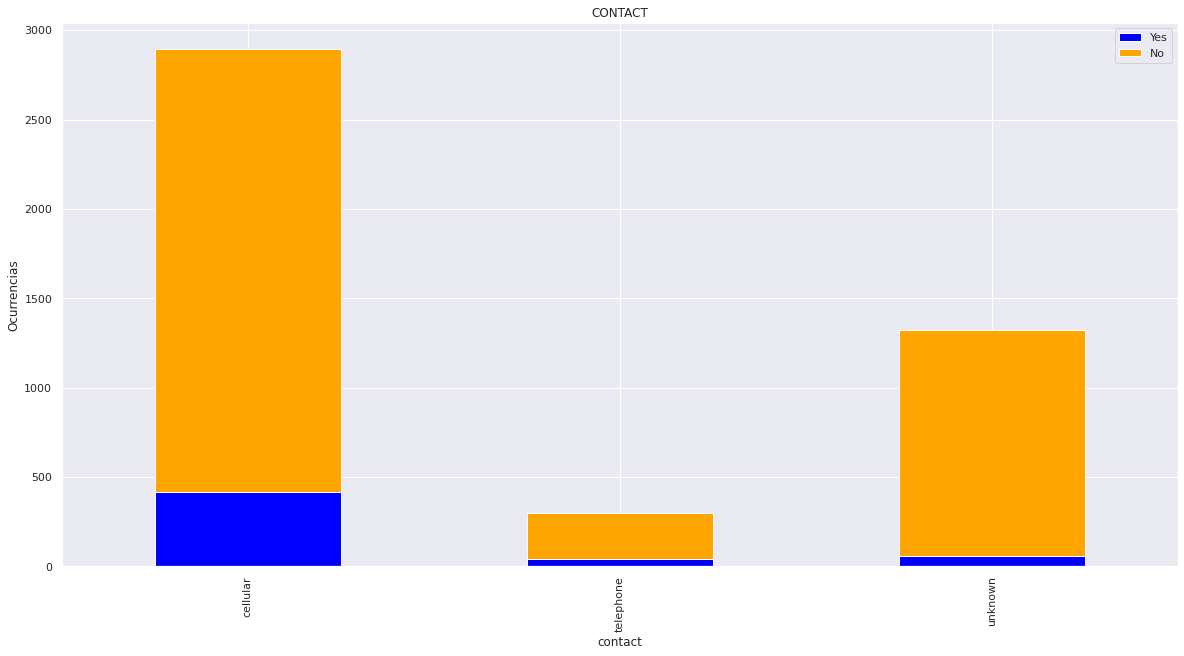

In [ ]:
barrassup('contact')

## CAMPAIGN

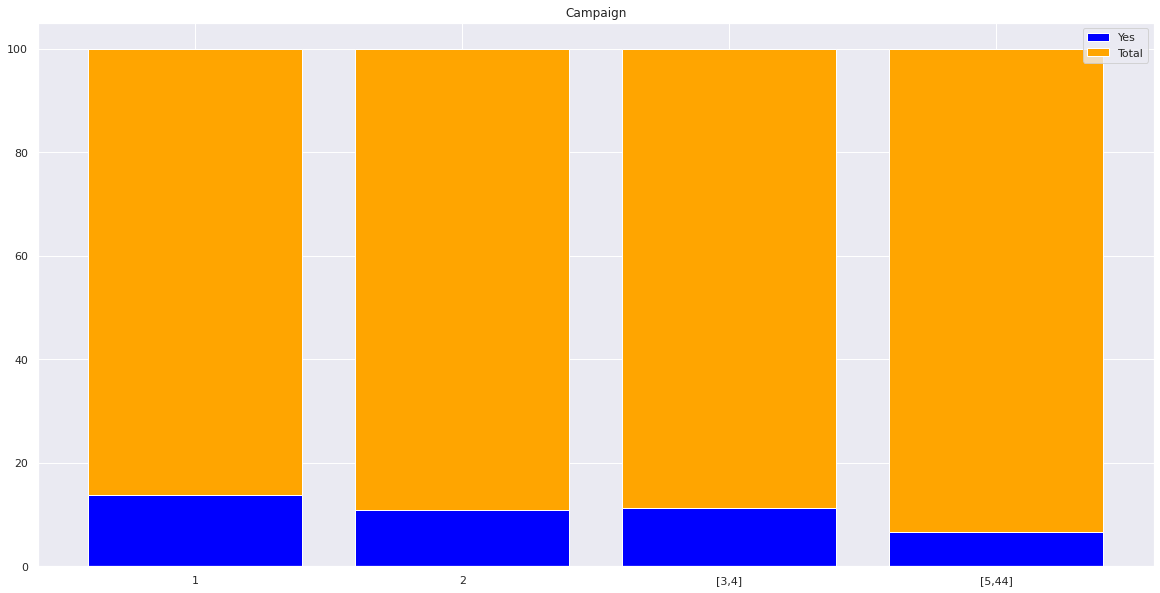

In [ ]:
yes = [(df[df.campaign == 1].groupby(by=["y"]).size()[1] * 100) / (df[df.campaign == 1].groupby(by=["y"]).size()[1] + df[df.campaign == 1].groupby(by=["y"]).size()[0]) ,
       (df[df.campaign == 2].groupby(by=["y"]).size()[1] * 100) / (df[df.campaign == 2].groupby(by=["y"]).size()[1] + df[df.campaign == 2].groupby(by=["y"]).size()[0]),
       (df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[1] * 100) / (df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[1] + df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[0]),
       (df[df.campaign >= 5].groupby(by=["y"]).size()[1] * 100) / (df[df.campaign >= 5].groupby(by=["y"]).size()[1] + df[df.campaign >= 5].groupby(by=["y"]).size()[0])]

no = [(df[df.campaign == 1].groupby(by=["y"]).size()[0] * 100) / (df[df.campaign == 1].groupby(by=["y"]).size()[1] + df[df.campaign == 1].groupby(by=["y"]).size()[0]) ,
       (df[df.campaign == 2].groupby(by=["y"]).size()[0] * 100) / (df[df.campaign == 2].groupby(by=["y"]).size()[1] + df[df.campaign == 2].groupby(by=["y"]).size()[0]),
       (df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[0] * 100) / (df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[1] + df[(df.campaign >= 3) & (df.campaign <= 4) ].groupby(by=["y"]).size()[0]),
       (df[df.campaign >= 5].groupby(by=["y"]).size()[0] * 100) / (df[df.campaign >= 5].groupby(by=["y"]).size()[1] + df[df.campaign >= 5].groupby(by=["y"]).size()[0]) ]

indice = [0,1,2,3]

graf_barrassup(no, yes, indice,['1','2','[3,4]', '[5,44]'], "Campaign")


## MONTH

       Positives  Negatives  Totals
month                              
apr           56        237     293
aug           79        554     633
dec            9         11      20
feb           38        184     222
jan           16        132     148
jul           61        645     706
jun           55        476     531
mar           21         28      49
may           93       1305    1398
nov           39        350     389
oct           37         43      80
sep           17         35      52




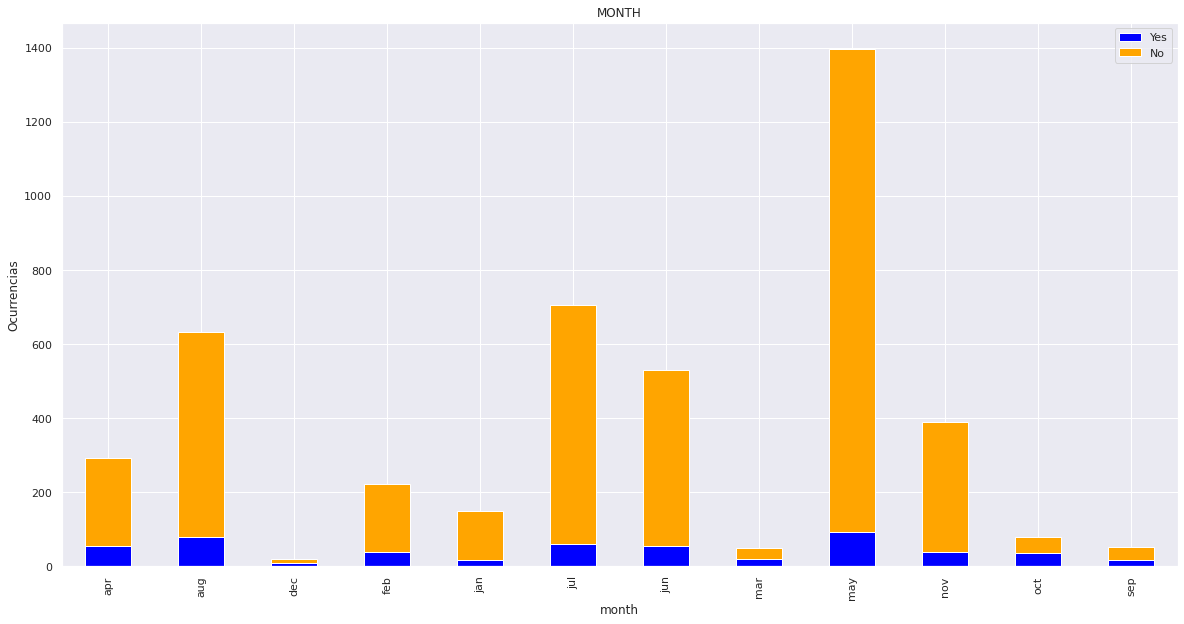

In [ ]:
barrassup('month')

## DURATION

Text(0.5, 1.0, 'Histograma de la Duración')

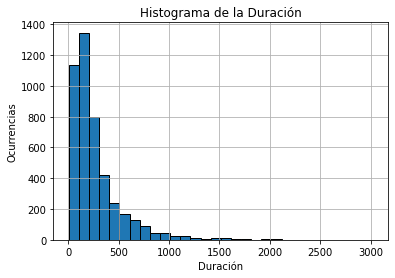

In [ ]:
df.duration.hist(bins = 30, edgecolor = 'black')
plt.xlabel('Duración')
plt.ylabel('Ocurrencias')
plt.title('Histograma de la Duración')

Text(0.5, 1.0, 'Histograma de la Duración if yes')

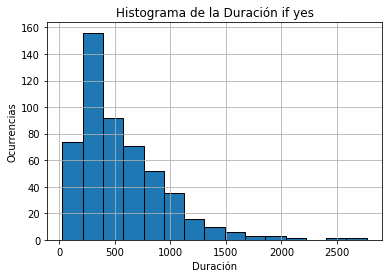

In [ ]:
df[df["y"]==1].duration.hist(bins = 15, edgecolor = 'black')
plt.xlabel('Duración')
plt.ylabel('Ocurrencias')
plt.title('Histograma de la Duración if yes')

##**Selección de Variables para las predicciones**

**Matriz de Correlación**

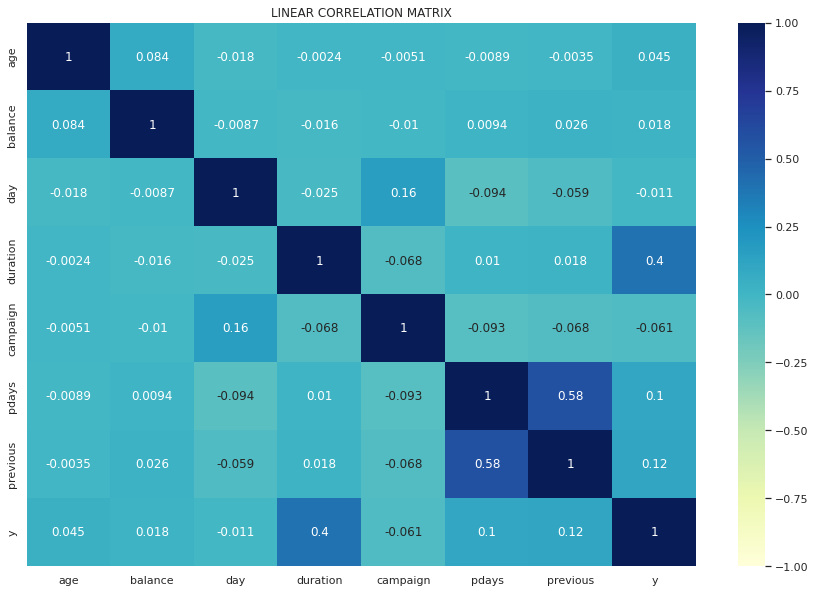

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

**Formateado de Datos**

En esta sección nos dedicaremos a formatear los datos de distintas formas para luego levantar con los distintos modelos los distintos formatos de datos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df_ = df.copy()

In [ ]:
y = pd.DataFrame(df_.y) #y es el target
df_.drop(['y'], axis=1, inplace=True) #sacamos la columna y
df_.drop(['duration'], axis = 1, inplace= True) #Sacamos la variable duration porque su relacion con el objetivo es predecible y marcado, por lo que cesga mucho las predicciones.
df_.drop(['age'], axis = 1, inplace= True)
df_.drop(['day'], axis = 1, inplace= True)
df_.drop(['previous'], axis = 1, inplace= True)
df_.drop(['default'], axis = 1, inplace= True)
df_.drop(['housing'], axis = 1, inplace= True)
df_.drop(['balance'], axis = 1, inplace= True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_, y,test_size = 0.2,random_state = 0)

**Convertimos dataset, Normalizando:**




In [ ]:
def convertir_dataset_norm(df__): #función para convertir variables, normalizando
  df__.index = range(df__.shape[0])
  df__=pd.get_dummies(df__, columns = ["job","marital","education","contact","month","poutcome"])
  #df__.default = df__.default.map({'yes':1, 'no':0})
  #df__.housing = df__.housing.map({'yes':1, 'no':0})
  df__.loan = df__.loan.map({'yes':1, 'no':0})
  columns = ['balance','campaign','pdays'] #ya que las demás son dummies o binarias
  norm = MinMaxScaler()
  df_devolver = norm.fit_transform(df__[columns])
  df_devolver = pd.DataFrame(df_devolver, columns = columns)
  df__.drop(columns=columns, inplace=True)
  df_devolver=pd.concat((df_devolver,df__), axis = 1)
  return df_devolver

In [ ]:
X_train_norm = convertir_dataset_norm(X_train)
X_test_norm = convertir_dataset_norm(X_test)

**Convertimos dataset, Estandarizando:**

In [ ]:
def convertir_dataset_estandar(df__): #función para convertir variables, estandarizando
  df__.index = range(df__.shape[0])
  df__=pd.get_dummies(df__, columns = ["job","marital","education","contact","month","poutcome"])
  #df__.default = df__.default.map({'yes':1, 'no':0})
  #df__.housing = df__.housing.map({'yes':1, 'no':0})
  df__.loan = df__.loan.map({'yes':1, 'no':0})
  columns = ['balance','campaign','pdays'] #ya que las demás son dummies o binarias
  norm = StandardScaler()
  df_devolver = norm.fit_transform(df__[columns])
  df_devolver = pd.DataFrame(df_devolver, columns = columns)
  df__.drop(columns=columns, inplace=True)
  df_devolver=pd.concat((df_devolver,df__), axis = 1)
  return df_devolver

In [ ]:
X_train_std = convertir_dataset_estandar(X_train) 
X_test_std = convertir_dataset_estandar(X_test) 

Usando imblearn:

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=0) 
X_resampled, y_res = ros.fit_resample(X_train, y_train) #hago el resample con el train y me guardo el test para probar el modelo después

In [ ]:
X_norm_res = convertir_dataset_norm(X_resampled) #resampleado de datos normalizados

In [ ]:
X_std_res = convertir_dataset_estandar(X_resampled) #resampleado de datos estandarizados


#**MODELOS**


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, plot_roc_curve

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

##**Regresiones sin datos remuestreados**

In [ ]:
# Ajuste de la regresion logistica al conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_norm, y_train.values.ravel())

LogisticRegression(random_state=0)

In [ ]:
# Prediccion de conjunto de pruebas
y_pred = classifier.predict(X_test_norm)

In [ ]:
# Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


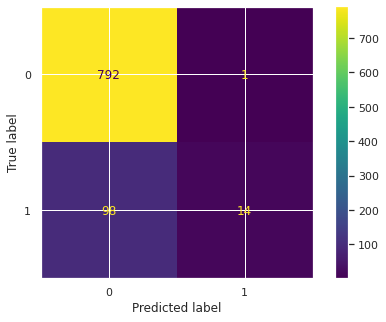

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    classifier,  
    X_test_norm,
    y_test,  
    ax=ax,
);

**Regresión buscando hiperparámetros**

In [ ]:
C = np.linspace(0.2,15, num=20)
param_grid = dict(C = C, max_iter = [60,100,200,250,300,350,400,450], penalty = ['l1', 'l2'])
logreg=LogisticRegression(solver = 'liblinear')
logreg_cv=GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = "recall")
logreg_cv.fit(X_train_norm,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([ 0.2       ,  0.97894737,  1.75789474,  2.53684211,  3.31578947,
        4.09473684,  4.87368421,  5.65263158,  6.43157895,  7.21052632,
        7.98947368,  8.76842105,  9.54736842, 10.32631579, 11.10526316,
       11.88421053, 12.66315789, 13.44210526, 14.22105263, 15.        ]),
                         'max_iter': [60, 100, 200, 250, 300, 350, 400, 450],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("recall :",logreg_cv.best_score_)
#tuned hpyerparameters :(best parameters)  {'C': 2.536842105263158, 'max_iter': 60, 'penalty': 'l1'}

tuned hpyerparameters :(best parameters)  {'C': 1.7578947368421054, 'max_iter': 60, 'penalty': 'l1'}
recall : 0.1419753086419753


In [ ]:
lg=LogisticRegression(max_iter=60, random_state=1, penalty = 'l1', C =1.75, solver = 'liblinear')
lg.fit(X_train_norm.values, y_train.values.ravel())

LogisticRegression(C=1.75, max_iter=60, penalty='l1', random_state=1,
                   solver='liblinear')

**Sobre el train:**

In [ ]:
from sklearn.metrics import confusion_matrix as cm
y_train_pred = cross_val_predict(lg, X_train_norm.values, y_train.values.ravel(), cv=5)
cm(y_train, y_train_pred) #Claramente clasifica mal los "yes". La exactitud alta se da porque los "no" si los clasifica bien.

array([[3171,   36],
       [ 351,   58]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_train, y_pred = y_train_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3207
           1       0.62      0.14      0.23       409

    accuracy                           0.89      3616
   macro avg       0.76      0.57      0.59      3616
weighted avg       0.87      0.89      0.86      3616



In [ ]:
y_pred_=lg.predict(X_train_norm.values)

In [ ]:
print(classification_report(y_true = y_train, y_pred = y_pred_)) #no hay overfitting

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3207
           1       0.63      0.15      0.24       409

    accuracy                           0.89      3616
   macro avg       0.77      0.57      0.59      3616
weighted avg       0.87      0.89      0.86      3616



In [ ]:
cm(y_train, y_pred_)

array([[3172,   35],
       [ 349,   60]])

**Sobre el test:**

In [ ]:
y_pred=lg.predict(X_test_norm.values)

In [ ]:
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       793
           1       0.94      0.13      0.23       112

    accuracy                           0.89       905
   macro avg       0.91      0.57      0.59       905
weighted avg       0.90      0.89      0.85       905



In [ ]:
cm(y_test, y_pred)

array([[792,   1],
       [ 97,  15]])

In [ ]:
y_train_pred = cross_val_predict(lg, X_train_norm.values, y_train.values.ravel(), cv=5)

In [ ]:
print("Accuracy:",accuracy_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred, average = "macro"))
print("Recall:",recall_score(y_train, y_train_pred, average = "macro"))


Accuracy: 0.8929756637168141
Precision: 0.7586809960491501
Recall: 0.5652919233065201


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


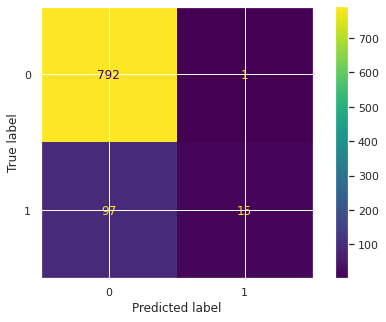

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    lg,  
    X_test_norm,
    y_test,  
    ax=ax,
);

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 22.8 MB/s 


In [ ]:
import shap

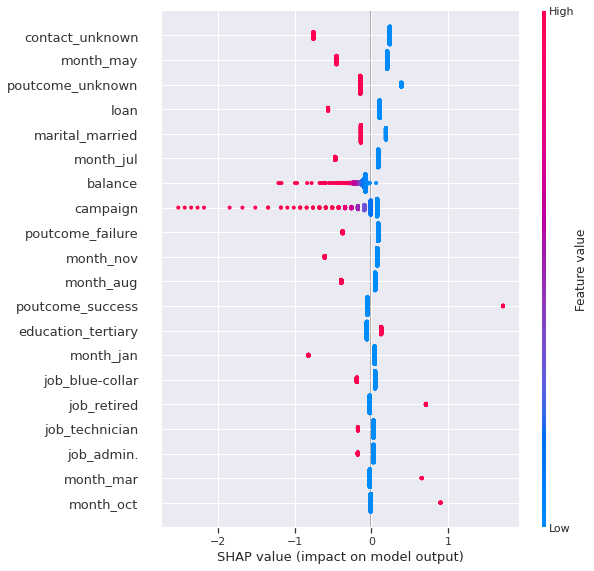

In [ ]:
import shap
shap_values = shap.LinearExplainer(lg,X_train_norm).shap_values(X_test_norm)
shap.summary_plot(shap_values, X_test_norm)

##**Con los datos remuestreados**





In [ ]:
param_grid = dict(C = np.linspace(0.2,5, num=30), max_iter = [50,60,100,150,200,300])
logreg=LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg_cv_res=GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = "recall")
logreg_cv_res.fit(X_norm_res,y_res.values.ravel())
#(best parameters)  {'C': 15.0, 'max_iter': 60, 'penalty': 'l1'}

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.2       , 0.36551724, 0.53103448, 0.69655172, 0.86206897,
       1.02758621, 1.19310345, 1.35862069, 1.52413793, 1.68965517,
       1.85517241, 2.02068966, 2.1862069 , 2.35172414, 2.51724138,
       2.68275862, 2.84827586, 3.0137931 , 3.17931034, 3.34482759,
       3.51034483, 3.67586207, 3.84137931, 4.00689655, 4.17241379,
       4.33793103, 4.50344828, 4.66896552, 4.83448276, 5.        ]),
                         'max_iter': [50, 60, 100, 150, 200, 300]},
             scoring='recall')

Acá hay una tendencia a pedir C más grandes y menos iteraciones (por eso C empieza en 2.5)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv_res.best_params_)
print("recall :",logreg_cv_res.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 4.6689655172413795, 'max_iter': 200}
recall : 0.6202215191411394


In [ ]:
logreg_res=LogisticRegression(max_iter=200, random_state=1, penalty = 'l1', C = 4.668, solver = 'liblinear')
logreg_res.fit(X_norm_res,y_res.values.ravel())

LogisticRegression(C=4.668, max_iter=200, penalty='l1', random_state=1,
                   solver='liblinear')

In [ ]:
y_pred=logreg_res.predict(X_test_norm) #predecimos sobre testeo

In [ ]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [ ]:
y_test.index = range(y_test.shape[0])
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       793
           1       0.29      0.46      0.35       112

    accuracy                           0.79       905
   macro avg       0.60      0.65      0.62       905
weighted avg       0.84      0.79      0.81       905



In [ ]:
cm(y_test, y_pred) 

array([[668, 125],
       [ 61,  51]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


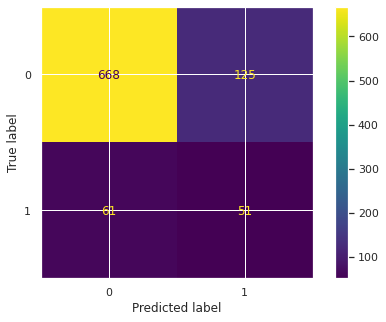

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    logreg_res,  
    X_test_norm,
    y_test,  
    ax=ax,
);

In [ ]:
pip install shap

In [ ]:
import shap

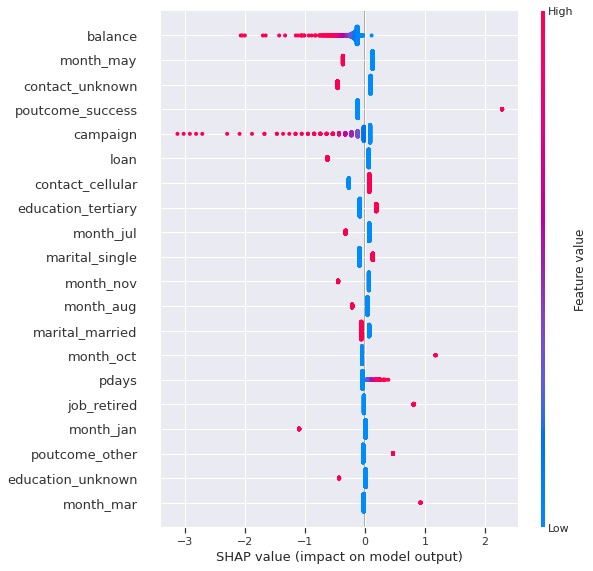

In [ ]:
shap_values = shap.LinearExplainer(logreg_res,X_norm_res).shap_values(X_test_norm)
#shap.summary_plot(shap_values, X_test_norm, plot_type="bar")
shap.summary_plot(shap_values, X_test_norm) #max_display=X_test_norm.shape[1

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print ('Train set:', X_train_norm.shape,  y_train.shape)
print ('Test set:', X_test_norm.shape,  y_test.shape)

Train set: (3616, 42) (3616, 1)
Test set: (905, 42) (905, 1)


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
Tree_cv = GridSearchCV(tree,parameters, cv=10, scoring = "recall")
Tree_cv.fit(X_train_norm,y_train)
print("tuned hpyerparameters :(best parameters) ",Tree_cv.best_params_)
print("recall :",Tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
recall : 0.27384146341463417


In [ ]:
#Utilizamos los mejores parametros obtenidos previamente para realizar el arbol de decisiones
Tree_opt = DecisionTreeClassifier(criterion= 'gini', max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, splitter = 'random' )
Tree_opt.fit(X_train_norm,y_train.values.ravel())

DecisionTreeClassifier(max_features='sqrt', splitter='random')

In [ ]:
from sklearn import metrics 
from sklearn import preprocessing

Tree_accuracy = Tree_opt.score(X_test_norm,y_test)
print("Decision Tree test accuracy: ", round(Tree_accuracy,3))

Decision Tree test accuracy:  0.813


In [ ]:
y_pred=Tree_opt.predict(X_test_norm)

In [ ]:
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       793
           1       0.24      0.24      0.24       112

    accuracy                           0.81       905
   macro avg       0.57      0.57      0.57       905
weighted avg       0.81      0.81      0.81       905



In [ ]:
cm(y_test, y_pred)

array([[709,  84],
       [ 85,  27]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


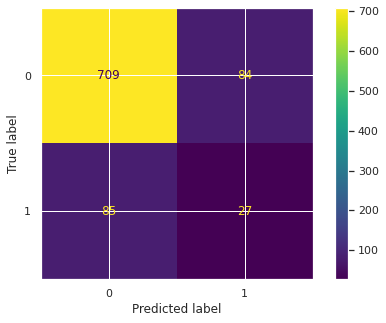

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    Tree_opt,  
    X_test_norm,
    y_test,  
    ax=ax,
);

Con los datos resampleados

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
Tree_cv = GridSearchCV(tree,parameters, cv=10, scoring = "recall")
Tree_cv.fit(X_norm_res,y_res)
print("tuned hpyerparameters :(best parameters) ",Tree_cv.best_params_)
print("recall :",Tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
recall : 1.0


In [ ]:
Tree_opt_res = DecisionTreeClassifier(criterion= 'gini', max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, splitter = 'best' )
Tree_opt_res.fit(X_norm_res,y_res)

DecisionTreeClassifier(max_features='auto')

In [ ]:
Tree_accuracy = Tree_opt_res.score(X_test_norm,y_test)
print("Decision Tree test accuracy: ", round(Tree_accuracy,3))

Decision Tree test accuracy:  0.807


In [ ]:
y_pred=Tree_opt_res.predict(X_test_norm)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       793
           1       0.22      0.21      0.22       112

    accuracy                           0.81       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.81      0.81      0.81       905



In [ ]:
cm(y_test, y_pred)

array([[706,  87],
       [ 88,  24]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


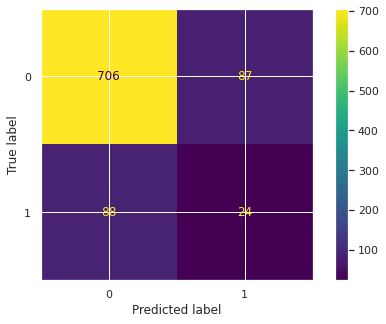

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    Tree_opt_res,  
    X_test_norm,
    y_test,  
    ax=ax,
);

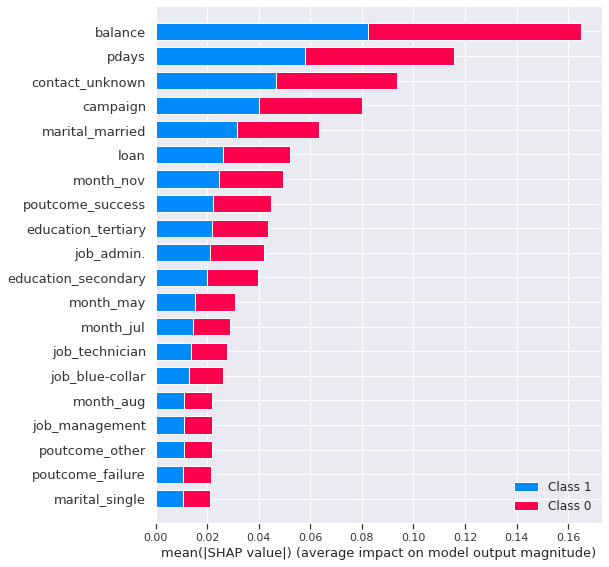

In [ ]:
shap_values = shap.TreeExplainer(Tree_opt_res,X_norm_res).shap_values(X_test_norm)
#shap.summary_plot(shap_values, X_test_norm, plot_type="bar")
shap.summary_plot(shap_values, X_test_norm, plot_type = "bar")

##**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
params = { 'C':[0.01,0.1,1,10],'kernel':['rbf','sigmoid'],'degree':[2,3,4,5],'gamma': [1, 0.1, 0.01, 0.001]}
svc_cv = GridSearchCV(SVC(),params)
svc_cv.fit(X_train_std,y_train.values.ravel())
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("recall :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
recall : 0.8938064999274049


In [ ]:
svc_opt = SVC(C= 10, degree= 2, gamma= 0.01, kernel= 'rbf')
svc_opt.fit(X_train_std,y_train.values.ravel())

SVC(C=10, degree=2, gamma=0.01)

In [ ]:
svc_accuracy = svc_opt.score(X_test_std,y_test)
print("Decision SVC test accuracy: ", round(svc_accuracy,3))

Decision SVC test accuracy:  0.89


In [ ]:
y_pred=svc_opt.predict(X_test_std)

In [ ]:
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       793
           1       0.77      0.15      0.25       112

    accuracy                           0.89       905
   macro avg       0.83      0.57      0.60       905
weighted avg       0.88      0.89      0.86       905



In [ ]:
cm(y_test, y_pred)

array([[788,   5],
       [ 95,  17]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


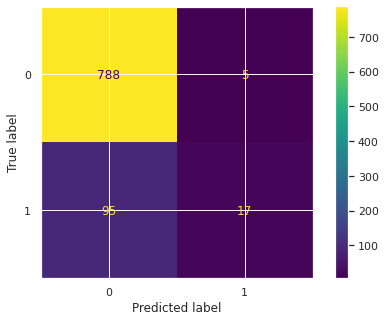

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    svc_opt,  
    X_test_std,
    y_test,  
    ax=ax,
);

Con los datos resampleados

In [ ]:
params = { 'C':[0.1,1,10],'kernel':['rbf','sigmoid'],'degree':[2,3,4],'gamma': [1, 0.1, 0.01]}
svc_cv_res = GridSearchCV(SVC(),params, scoring = "recall")
svc_cv_res.fit(X_std_res,y_res.values.ravel())
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("recall :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
recall : 0.8938064999274049


In [ ]:
svc_opt_res = SVC(C= 10, degree= 2, gamma= 0.01, kernel= 'rbf', probability = True)
svc_opt_res.fit(X_std_res,y_res.values.ravel())

SVC(C=10, degree=2, gamma=0.01, probability=True)

In [ ]:
svc_accuracy = svc_opt_res.score(X_test_std,y_test)
print("Decision SVC test accuracy: ", round(svc_accuracy,3))

Decision SVC test accuracy:  0.807


In [ ]:
y_pred=svc_opt_res.predict(X_test_std)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       793
           1       0.32      0.48      0.38       112

    accuracy                           0.81       905
   macro avg       0.62      0.67      0.63       905
weighted avg       0.85      0.81      0.82       905



In [ ]:
cm(y_test, y_pred)

array([[676, 117],
       [ 58,  54]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


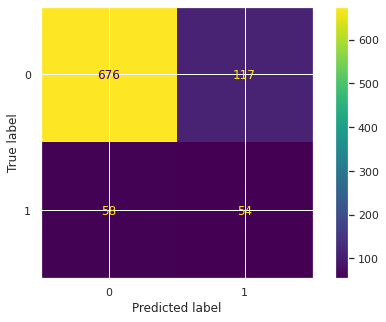

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    svc_opt_res,  
    X_test_std,
    y_test,  
    ax=ax,
);

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


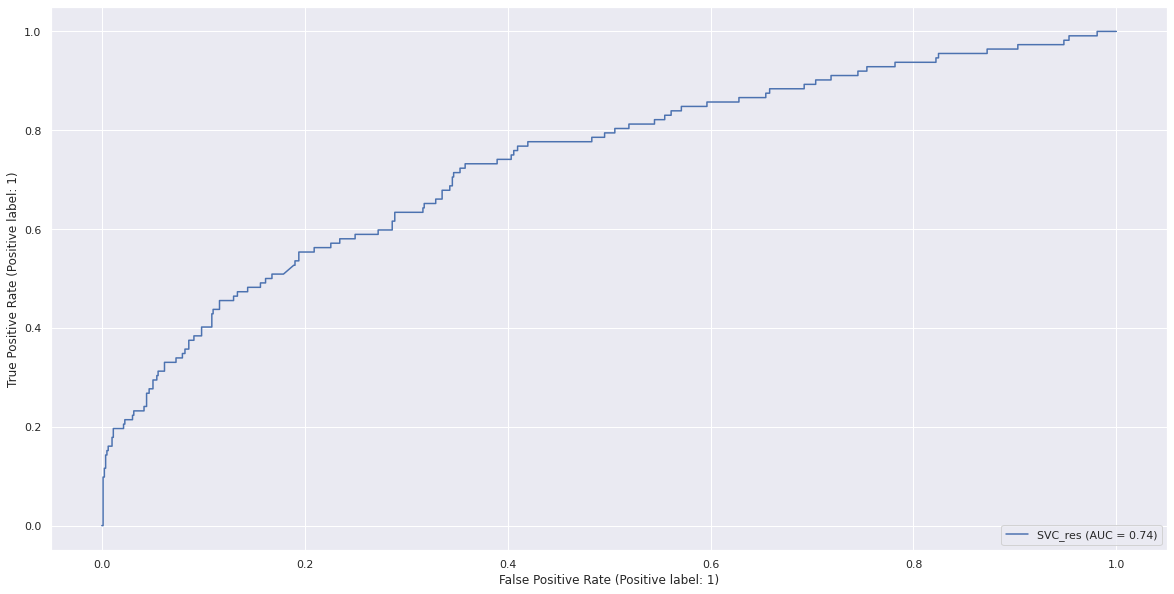

In [ ]:
disp=plot_roc_curve(svc_opt_res, X_test_std, y_test, name = "SVC_res")
print(disp)

# **Comparación de Curvas ROC**

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or

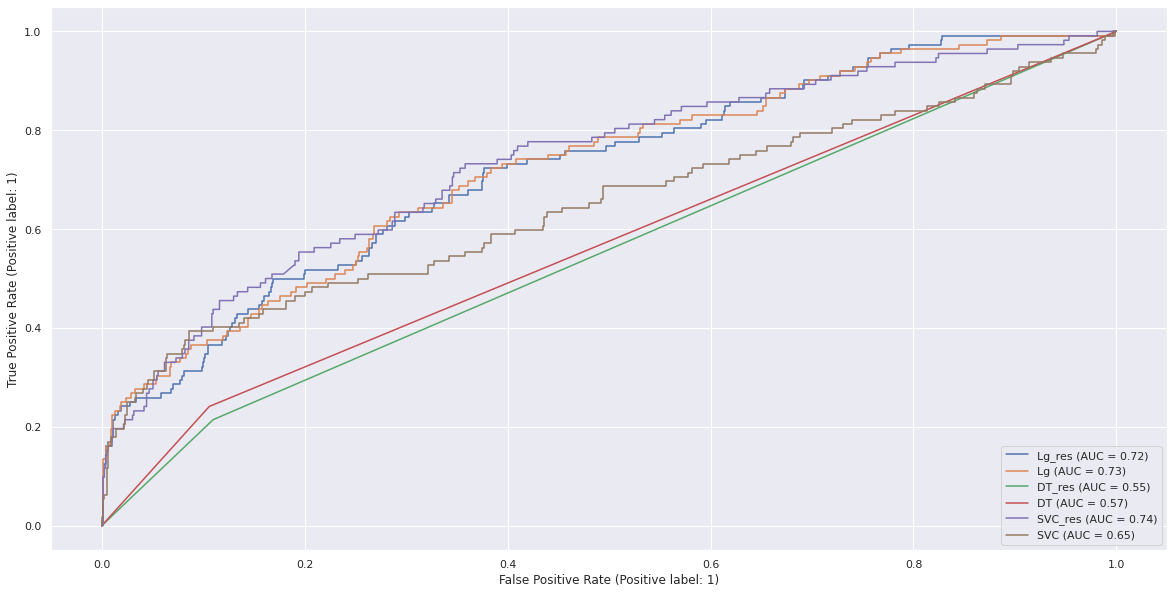

In [ ]:
disp = plot_roc_curve (logreg_res, X_test_norm, y_test.values.ravel(), name = "Lg_res")
plot_roc_curve(lg, X_test_norm.values, y_test.values.ravel(), ax=disp.ax_, name = "Lg");
plot_roc_curve(Tree_opt_res, X_test_norm, y_test , ax=disp.ax_, name = "DT_res");
plot_roc_curve(Tree_opt, X_test_norm, y_test , ax=disp.ax_, name = "DT");
plot_roc_curve(svc_opt_res, X_test_std, y_test, ax=disp.ax_, name = "SVC_res");
plot_roc_curve(svc_opt, X_test_std, y_test,ax=disp.ax_, name = "SVC");